# Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Constants

In [185]:
GRAVITY_WAVE_PHASE_SPEED = 50 # m/s
EARTH_RADIUS = 6371.0072e3    # m
gross_dry_stability = 3.12e4  
gross_moisture_stratification = 0.75*gross_dry_stability
zonal_moistening_parameter = 5.0e-4
cloud_radiative_parameter = 0.2
moisture_sensitivity = 1/(6*3600)

# Free Variables

In [186]:
temperature_sensitivity = np.linspace(1/2, 0, 1000)/3600

t2_index = np.abs(temperature_sensitivity*3600 - 1/2).argmin()
t3_index = np.abs(temperature_sensitivity*3600 - 1/3).argmin()

zonal_wavenumber = np.arange(0.1, 6.1, 0.01)/EARTH_RADIUS
k1_index = np.abs(zonal_wavenumber*EARTH_RADIUS - 1).argmin()
k2_index = np.abs(zonal_wavenumber*EARTH_RADIUS - 2).argmin()

[K, T] = np.meshgrid(
    zonal_wavenumber, 
    temperature_sensitivity, 
    indexing='xy'
)

# Derived parameters

In [187]:
gross_moist_stability = (gross_dry_stability - gross_moisture_stratification)/gross_dry_stability
effective_gross_moist_stability = gross_moist_stability*(1+cloud_radiative_parameter) - cloud_radiative_parameter

derived_zonal_moistening_parameter = (
    (zonal_moistening_parameter/gross_dry_stability)
    * (
        (1 + cloud_radiative_parameter)
        / (effective_gross_moist_stability * K)
    )
)
    
effective_sensitivity = moisture_sensitivity + T*(1+cloud_radiative_parameter)

reduced_gross_moist_stability = moisture_sensitivity*effective_gross_moist_stability/effective_sensitivity

# Calculate growth

In [188]:
A = 1/np.sqrt(2)*(np.sqrt(np.sqrt(1+derived_zonal_moistening_parameter**2)+1))
B = 1/np.sqrt(2)*(np.sqrt(np.sqrt(1+derived_zonal_moistening_parameter**2)-1))

growth = (
    GRAVITY_WAVE_PHASE_SPEED*K*np.sqrt(reduced_gross_moist_stability)*np.sign(derived_zonal_moistening_parameter)*B
    - GRAVITY_WAVE_PHASE_SPEED**2*K**2*(1-reduced_gross_moist_stability)/(2*effective_sensitivity)
)

moist_phase_speed = (
    GRAVITY_WAVE_PHASE_SPEED*np.sqrt(reduced_gross_moist_stability)*A
    - (
        GRAVITY_WAVE_PHASE_SPEED**2*(zonal_moistening_parameter/gross_dry_stability)
        *moisture_sensitivity*(1+cloud_radiative_parameter)/(2*effective_sensitivity**2)
    )
)

In [173]:
moist_phase_speed[t2_index, k1_index]

9.905415454650043

# Plot

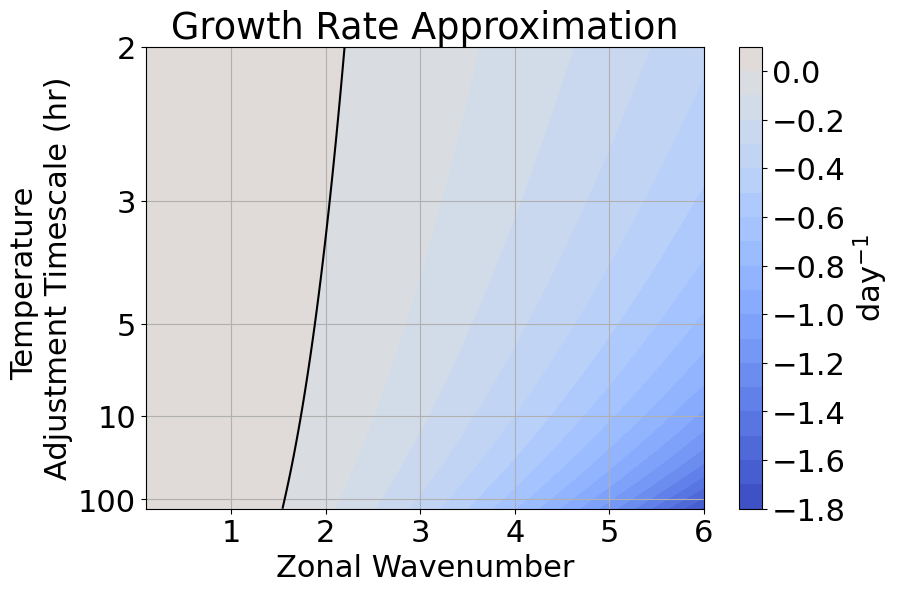

In [193]:
plt.rcParams.update({'font.size':22})
[fig, ax] = plt.subplots(1, 1, figsize=(9,6))
ax.set_title('Growth Rate Approximation')
g = ax.contourf(
    K*EARTH_RADIUS,
    T*3600,
    3600*24*growth,
    cmap='coolwarm',
    norm=mcolors.CenteredNorm(vcenter=0),
    levels=21
)

ax.contour(    
    K*EARTH_RADIUS,
    T*3600,
    3600*24*growth,
    colors='k',
    levels=[0]
)
cbar = fig.colorbar(g)
cbar.set_label(r"day$^{-1}$")
# ax.invert_yaxis()
ax.set_xlabel('Zonal Wavenumber')
# ax.set_ylabel('Temperature Sensitivity (1/hr)')
ax.set_ylabel(f'Temperature \nAdjustment Timescale (hr)')
ax.set_yticks(
    ticks=[1/100, 1/10, 1/5, 1/3, 1/2], 
    labels=[100, 10, 5, 3, 2]
)
ax.set_xlim(0.1, 6)
plt.grid(True)
plt.show()

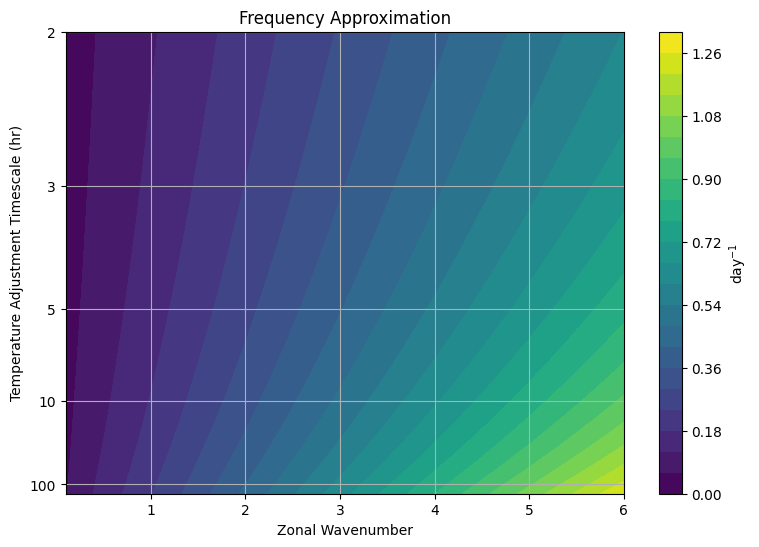

In [191]:
[fig, ax] = plt.subplots(1, 1, figsize=(9,6))
ax.set_title('Frequency Approximation')
g = ax.contourf(
    K*EARTH_RADIUS,
    T*3600,
    3600*24*moist_phase_speed*K,
    cmap='viridis',
    levels=21
)

cbar = fig.colorbar(g)
cbar.set_label(r"day$^{-1}$")
ax.set_xlabel('Zonal Wavenumber')
# ax.set_ylabel('Temperature Sensitivity (1/hr)')
ax.set_ylabel('Temperature Adjustment Timescale (hr)')
ax.set_yticks(
    ticks=[1/100, 1/10, 1/5, 1/3, 1/2], 
    labels=[100, 10, 5, 3, 2]
)
ax.set_xlim(0.1, 6)
plt.grid(True)
plt.show()